# Neuro ML 2020

## Seminar 5: Functional connectivity

In [29]:
pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 24.2 MB/s 


In [30]:
pip install diagram2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import os
import re

import pandas as pd
import numpy as np

import nibabel as nib

import nilearn
from nilearn.image import concat_imgs
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import high_variance_confounds
from nilearn.connectome import ConnectivityMeasure
from nilearn import datasets

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import networkx as nx 
import nilearn # pip install nilearn
from scipy.stats import spearmanr
from sklearn.metrics import mutual_info_score
import warnings
warnings.filterwarnings("ignore")

## Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Get the data. Add a shortcut to your Google Drive 

Shared link: https://drive.google.com/file/d/1PCJxMltTSAO-rHXEeUuQ0jqHy1yfmja4/view?usp=sharing

In [24]:
! unzip drive/MyDrive/нейро/neuro2022/seminar_5/abide2.zip && ls

Archive:  drive/MyDrive/нейро/neuro2022/seminar_5/abide2.zip
   creating: ABIDEII-GU_1/
   creating: ABIDEII-GU_1/sub-28837/
   creating: ABIDEII-GU_1/sub-28837/ses-1/
   creating: ABIDEII-GU_1/sub-28837/ses-1/func/
  inflating: ABIDEII-GU_1/sub-28837/ses-1/func/sub-28837_ses-1_task-rest_run-1_bold.nii.gz  
   creating: ABIDEII-GU_1/sub-28831/
   creating: ABIDEII-GU_1/sub-28831/ses-1/
   creating: ABIDEII-GU_1/sub-28831/ses-1/func/
  inflating: ABIDEII-GU_1/sub-28831/ses-1/func/sub-28831_ses-1_task-rest_run-1_bold.nii.gz  
   creating: ABIDEII-GU_1/sub-28846/
   creating: ABIDEII-GU_1/sub-28846/ses-1/
   creating: ABIDEII-GU_1/sub-28846/ses-1/func/
  inflating: ABIDEII-GU_1/sub-28846/ses-1/func/sub-28846_ses-1_task-rest_run-1_bold.nii.gz  
   creating: ABIDEII-GU_1/sub-28840/
   creating: ABIDEII-GU_1/sub-28840/ses-1/
   creating: ABIDEII-GU_1/sub-28840/ses-1/func/
  inflating: ABIDEII-GU_1/sub-28840/ses-1/func/sub-28840_ses-1_task-rest_run-1_bold.nii.gz  
   creating: ABIDEII-GU_1/su

In [5]:
data = 'ABIDEII-GU_1'

In [6]:
def make_correlation_matrix(path_to_fmriprep_data, path_to_save_connectivity_matrices=False):
    """
        Process the fmriprep preprocessed functional MRI time-series into 2D correlation matrix as DataFrame using Nilearn lib.
    """
   
    dataset = datasets.fetch_atlas_aal(version='SPM12', data_dir=None, url=None, resume=True, verbose=1)
    atlas_filename = dataset.maps
    labels = dataset.labels
    correlation_measure = ConnectivityMeasure(kind='correlation')
    ts =  []
    for n_patient, patient_folder_name in enumerate(os.listdir(path_to_fmriprep_data)[:4]):
        print(n_patient, patient_folder_name)
        temp_path = os.path.join(path_to_fmriprep_data, patient_folder_name)
        print(temp_path)
           # temp_path = path_to_fmriprep_data + patient_folder_name + '/func/'
        for filename in os.listdir(os.path.join(temp_path, 'ses-1/func')):
                    print(filename)

                    print(os.path.join(temp_path, 'ses-1/func', filename))

#                     tr = tr_extractor(os.path.join(temp_path, 'ses-1/func', filename))
#                     print(tr)
                    tr = 2
                     # extracted data from non-overlapping volumes
                    masker = NiftiLabelsMasker(labels_img=atlas_filename, background_label=labels, 
                               standardize=True, detrend=True, resampling_target='labels', 
                               low_pass=0.08, high_pass=0.009, t_r=tr, memory='nilearn_cache', memory_level=1, verbose=0)
                    
                    img = concat_imgs(os.path.join(temp_path, 'ses-1/func', filename), auto_resample=True, verbose=0)
                    print(img.shape)
                    confounds = high_variance_confounds(img, 1)
                    time_series = masker.fit_transform(img, confounds)
                    print(time_series.shape)
                    ts.append(time_series)
                    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
                    np.fill_diagonal(correlation_matrix, 1)

    return ts, time_series, correlation_matrix    

In [11]:
# load ABIDE1 data from NYU site
ts, time_series, correlation_matrix = make_correlation_matrix(data)

0 sub-28838
ABIDEII-GU_1/sub-28838
sub-28838_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28838/ses-1/func/sub-28838_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)
(152, 117)
1 sub-28835
ABIDEII-GU_1/sub-28835
sub-28835_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28835/ses-1/func/sub-28835_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)
(152, 117)
2 sub-28832
ABIDEII-GU_1/sub-28832
sub-28832_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28832/ses-1/func/sub-28832_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)
(152, 117)
3 sub-28845
ABIDEII-GU_1/sub-28845
sub-28845_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28845/ses-1/func/sub-28845_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)
(152, 117)


In [12]:
ts = np.stack(ts)
(n_patients, n_steps, n_regions) = ts.shape

In [13]:
n_patients, n_steps, n_regions

(4, 152, 117)

### Multivariate time-series

#### Visualization of time series

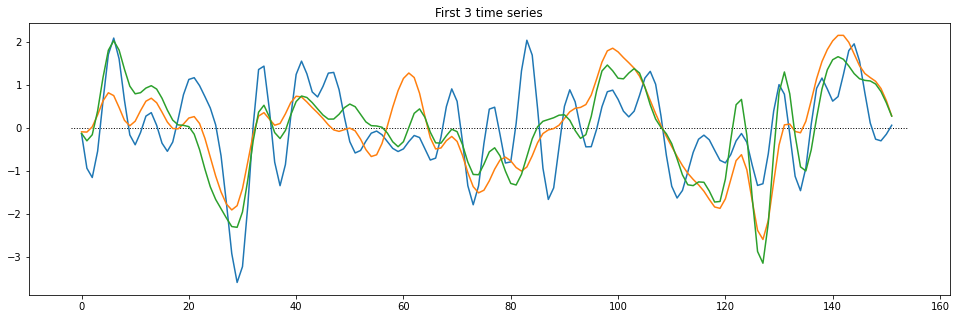

In [14]:
# visualization of raw time series
plt.figure(figsize=(16.5,5))
plt.title("First 3 time series")
plt.hlines(0, -2, n_steps+2, linewidth=1.0, linestyles="dotted")
plt.plot(ts[0,:,:3])
plt.show()

In [40]:
# mean and standard deviation
print("Mean ± std of the:")
print("1st time series: {:.3f} ± {:.3f}".format(np.mean(ts[0,:,0]), np.std(ts[0,:,0])))
print("2nd time series: {:.3f} ± {:.3f}".format(np.mean(ts[0,:,1]), np.std(ts[0,:,1])))
print("3rd time series: {:.3f} ± {:.3f}".format(np.mean(ts[0,:,2]), np.std(ts[0,:,2])))

Mean ± std of the:
1st time series: 0.000 ± 1.000
2nd time series: -0.000 ± 1.000
3rd time series: 0.000 ± 1.000


#### Normalization and trend removal

In [16]:
# break 2nd and 3rd time series
ts[0,:,1] = ts[0,:,1] + 150 # add mean shift
ts[0,:,2] = ts[0,:,2] + np.linspace(0, 150, n_steps) # add trend

In [17]:
print("Mean ± std of the:")
print("1st time series: {:.3f} ± {:.3f}".format(np.mean(ts[0,:,0]), np.std(ts[0,:,0])))
print("2nd time series: {:.3f} ± {:.3f}".format(np.mean(ts[0,:,1]), np.std(ts[0,:,1])))
print("3rd time series: {:.3f} ± {:.3f}".format(np.mean(ts[0,:,2]), np.std(ts[0,:,2])))

Mean ± std of the:
1st time series: 0.000 ± 1.000
2nd time series: 150.000 ± 1.000
3rd time series: 75.000 ± 43.596


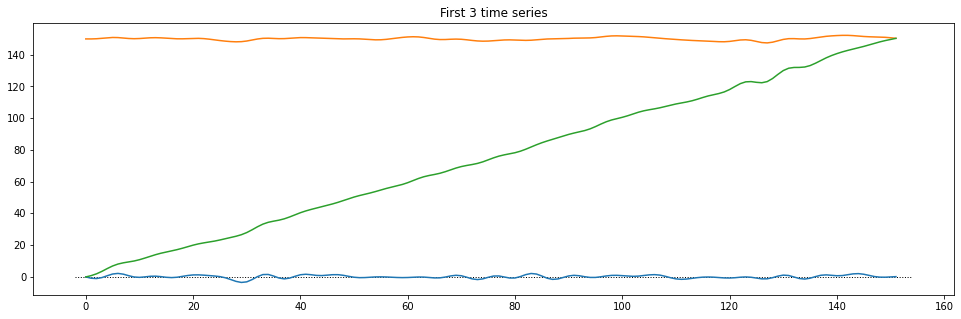

In [18]:
# visualization of broken time series
plt.figure(figsize=(16.5,5))
plt.title("First 3 time series")
plt.hlines(0, -2, n_steps+2, linewidth=1.0, linestyles="dotted")
plt.plot(ts[0,:,:3])
plt.show()

In [19]:
from nilearn.signal import clean

In [20]:
ts_normalized = np.zeros_like(ts)

# normalize and detrend
for i in range(ts.shape[0]):
    ts_normalized[i] = clean(ts[i], standardize="zscore", detrend=True)
    
print("Mean ± std of the:")
print("1st time series: {:.3f} ± {:.3f}".format(np.mean(ts_normalized[0,:,0]), np.std(ts_normalized[0,:,0])))
print("2nd time series: {:.3f} ± {:.3f}".format(np.mean(ts_normalized[0,:,1]), np.std(ts_normalized[0,:,1])))
print("3rd time series: {:.3f} ± {:.3f}".format(np.mean(ts_normalized[0,:,2]), np.std(ts_normalized[0,:,2])))

Mean ± std of the:
1st time series: 0.000 ± 1.000
2nd time series: -0.000 ± 1.000
3rd time series: 0.000 ± 1.000


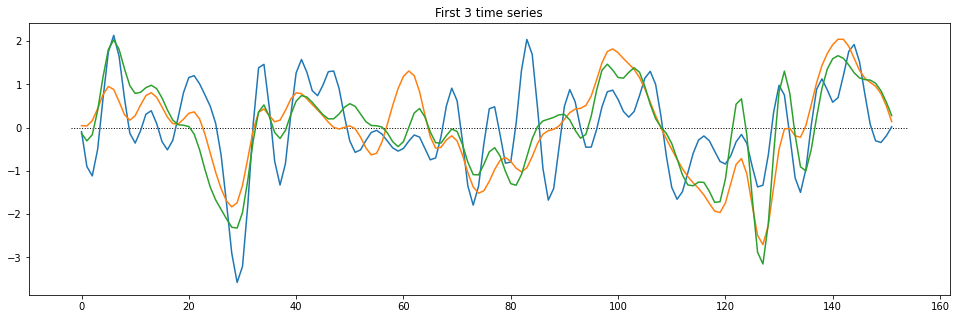

In [21]:
# visualization of raw time series
plt.figure(figsize=(16.5,5))
plt.title("First 3 time series")
plt.hlines(0, -2, n_steps+2, linewidth=1.0, linestyles="dotted")
plt.plot(ts_normalized[0,:,:3])
plt.show()

In [35]:
ts = ts_normalized

## Metrics of functional connectivity

### Pearson correlation

In [36]:
from nilearn.connectome import ConnectivityMeasure
from sklearn.covariance import EmpiricalCovariance

covariance_estimator = EmpiricalCovariance()
connectivity_correlation = ConnectivityMeasure(kind="correlation", cov_estimator=covariance_estimator)

In [37]:
ts[0].shape

(152, 117)

In [38]:
R = connectivity_correlation.fit_transform(ts)
R.shape

(4, 117, 117)

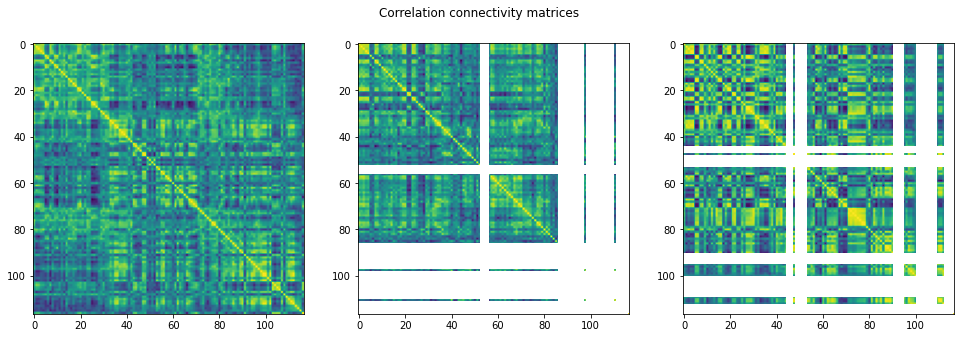

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16.5,5))
plt.suptitle("Correlation connectivity matrices")
ax1.imshow(R[0])
ax2.imshow(R[1])
ax3.imshow(R[2])
plt.show()

### Regularization

_Condition number_ - minimum/maximum eigenvalue ratio of a matrix


#### Tikhonov regularization

$$\tilde{\mathbf{C}}_X = \mathbf{C}_X + \alpha \mathbf{I},~~~\alpha > 0$$

**Task**

Check the minimum eigenvalue of a correlation matrix

In [41]:
np.min(np.linalg.eigvalsh(R[0]))

3.7195810685471437e-16

**Task**

Apply Tikhonov regularization and check how it affects the minimum eigenvalue of a correlation matrix

In [42]:
### your code here

alpha = 0.01
R_regularized = R[0] + alpha * np.eye(n_regions)

#### Shrinkage estimators

Ledoit-Wolf

$$\tilde{\mathbf{C}}_X = (1 - \beta)\mathbf{C}_X + \alpha \beta \mathbf{I},~~~\alpha > 0, 0 \leq \beta \leq 1\\
\alpha = \frac{trace(\mathbf{C})}{n_{features}}$$

A well conditioned estimator for large dimensional covariance matrices, $\alpha$ is predefined according to formula, $\beta$ is inferred from data.

In [43]:
from sklearn.covariance import LedoitWolf

cov_estimator_shrinked = LedoitWolf()
connectivity_correlation_shrinked = ConnectivityMeasure(kind="correlation", cov_estimator=cov_estimator_shrinked)

In [44]:
# check the value of beta parameter
cov = cov_estimator_shrinked.fit(ts[0])
cov.shrinkage_

0.07518206127948973

In [45]:
R_shrinked = connectivity_correlation_shrinked.fit_transform(ts)

In [46]:
# checking the minimum eigenvalue
np.min(np.linalg.eigvalsh(R_shrinked[0]))

0.075181074

### Spearman correlation

In [47]:
from scipy.stats import spearmanr

In [48]:
S = np.zeros((3, n_regions, n_regions))

for i in range(3):
    S[i], _ = spearmanr(ts[i])

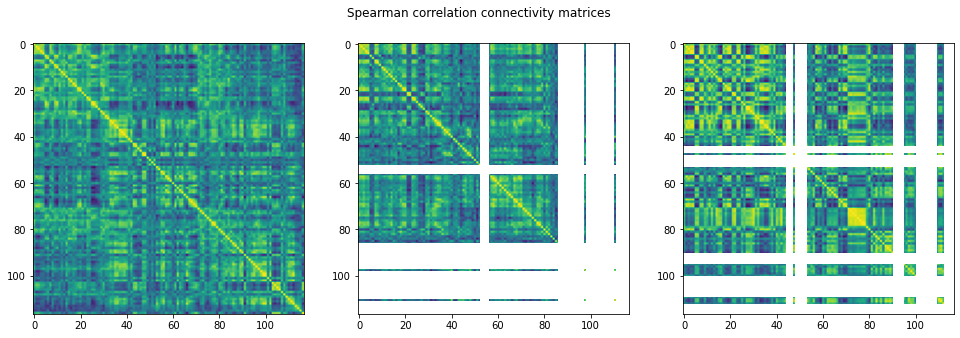

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16.5,5))
plt.suptitle("Spearman correlation connectivity matrices")
ax1.imshow(S[0])
ax2.imshow(S[1])
ax3.imshow(S[2])
plt.show()

### Mutual information

Mutual information measures the information that random variables $X$ and $Y$ share, how much knowing one of these variables reduces uncertainty about the other. determined how different to joint distributon $p(X, Y)$ is to the production of the marginal distrubutions $p(X) p(Y)$.

$$I(X, Y) = \sum_{(x, y)} p(x, y) \log_2 \left( \frac{p(x, y)}{p(x)p(y)} \right)$$

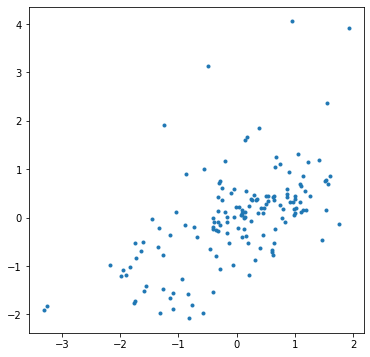

In [50]:
plt.figure(figsize=(6,6))
plt.plot(ts[2,:,0], ts[2,:,12], ".")

In [51]:
from sklearn.metrics import mutual_info_score

def calc_MI(x, y, bins=10):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

def bound(x):
    return np.sqrt(1 - np.exp(-2 * x))

In [52]:
l = calc_MI(ts[1,:,42], ts[1,:,45])
l, bound(l)

(0.3345904947252815, 0.6984784576646944)

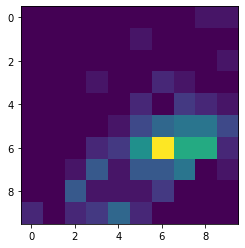

In [53]:
c_xy = np.rot90(np.histogram2d(ts[2,:,0], ts[2,:,12], 10)[0])
plt.imshow(c_xy)

In [54]:
l = calc_MI(ts[1,:,42], ts[1,:,41])
l, bound(l)

(0.31856566732864133, 0.6864348321365467)

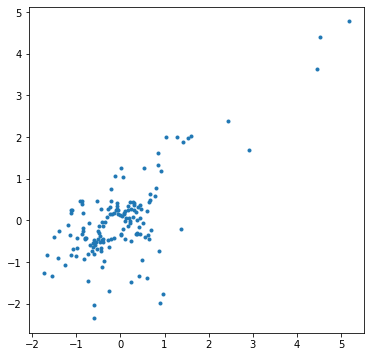

In [55]:
plt.figure(figsize=(6,6))
plt.plot(ts[2,:,42], ts[2,:,41], ".")

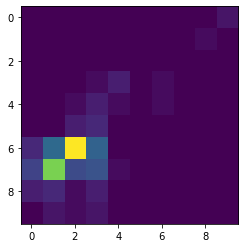

In [56]:
c_xy = np.rot90(np.histogram2d(ts[2,:,42], ts[2,:,41], 10)[0])
plt.imshow(c_xy)

In [57]:
%%time
M = np.zeros((3, n_regions, n_regions))

for k in range(3):
    for i in range(n_regions):
        for j in range(i, n_regions):
            M[k,i,j] = bound(calc_MI(ts[k,:,i], ts[k,:,j]))
            
    M[k] = M[k] + M[k].T
    np.fill_diagonal(M[k], 1)

CPU times: user 9.08 s, sys: 56 ms, total: 9.14 s
Wall time: 9.12 s


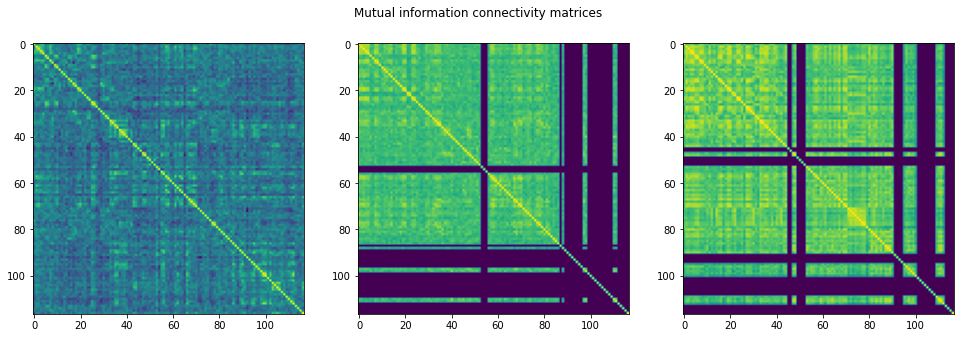

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16.5,5))
plt.suptitle("Mutual information connectivity matrices")
ax1.imshow(M[0])
ax2.imshow(M[1])
ax3.imshow(M[2])
plt.show()



#### Thresholding

In [59]:
R_tresholded = R[0].copy()
np.fill_diagonal(R_tresholded, 0)
R_tresholded[R_tresholded < 0.5] = 0.0
R_tresholded

array([[0.        , 0.53515619, 0.6150385 , ..., 0.        , 0.        ,
        0.        ],
       [0.53515619, 0.        , 0.86049813, ..., 0.        , 0.        ,
        0.        ],
       [0.6150385 , 0.86049813, 0.        , ..., 0.        , 0.        ,
        0.50330269],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.50330269, ..., 0.        , 0.        ,
        0.        ]])

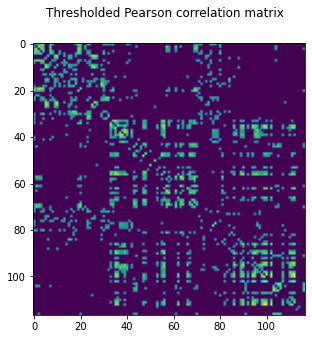

In [60]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,5))
plt.suptitle("Thresholded Pearson correlation matrix")
ax1.imshow(R_tresholded)
plt.show()

## Network visualization

In [61]:
from nilearn import plotting

# get coordinates of brain regions
atlas_aal = nilearn.datasets.fetch_atlas_aal()
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_aal["maps"])

In [64]:
coordinates.shape

(116, 3)

ValueError: ignored

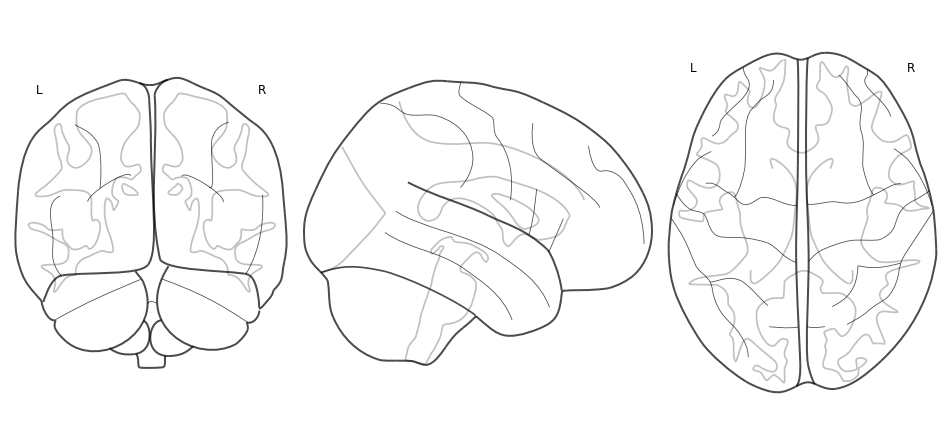

In [62]:
# nilearn graph drawing
fig = plt.figure(figsize=(13,6))
edge_options = {"color": "r", "linewidth": 1.5, "alpha": 0.5}
plotting.plot_connectome(R_tresholded, coordinates, figure=fig, edge_kwargs=edge_options)

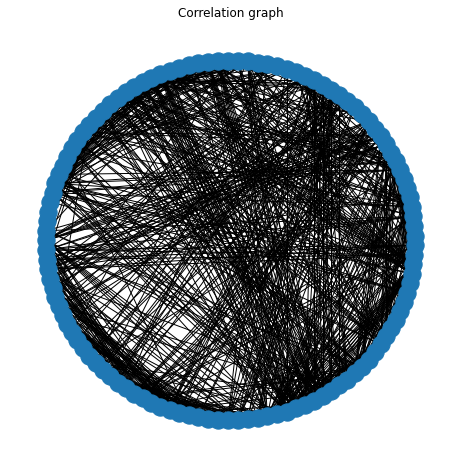

In [67]:
# matplotlib graph drawing
fig, (ax1) = plt.subplots(1, 1, figsize=(8,8))
ax1.set_title("Correlation graph")
nx.draw_shell(nx.from_numpy_array(R_tresholded), ax=ax1)
plt.show()

## Network analysis

### Graph-theoretic

In [68]:
# create graph from connectivity matrix
G_R = nx.from_numpy_array(R_tresholded)

#### Node degree

In [69]:
degree = np.array([degree[1] for degree in nx.degree(G_R)])
degree

array([26, 17, 15, 21, 20, 13, 11, 19, 14, 15, 10,  8,  4, 14,  7, 15, 20,
       12, 17, 15, 20,  3,  7, 20, 19, 10, 10,  9,  0, 15, 22, 11, 13, 31,
       22, 34, 29, 19, 19, 28, 19,  6, 13, 21, 19,  3,  3, 27, 26,  1,  2,
        0,  2, 18,  2, 31, 32, 18, 21,  3,  0, 19, 19, 15, 20,  0, 19, 28,
       16, 24, 19,  9, 16,  6,  6,  6, 16, 14, 15, 14, 13, 12, 12,  5, 10,
        5, 31,  7,  4, 27, 28,  6, 18,  1, 25, 30, 21, 16, 23, 26, 27,  4,
       24,  7, 12, 12,  7, 21,  3,  5, 21, 27, 24,  2,  1,  0, 11])

In [70]:
neighbor_degree_avg = np.array(list(nx.average_neighbor_degree(G_R).values()))
neighbor_degree_avg

array([17.19230769, 17.82352941, 17.93333333, 18.23809524, 16.        ,
       12.46153846, 11.09090909, 15.78947368, 16.35714286, 13.33333333,
       11.3       , 16.75      , 12.75      , 14.07142857, 20.85714286,
       13.06666667, 12.95      , 14.66666667, 15.70588235, 19.2       ,
       19.8       , 14.66666667, 18.42857143, 16.8       , 16.89473684,
       11.1       , 11.5       , 11.44444444,  0.        , 15.13333333,
       15.5       , 16.63636364, 17.61538462, 23.80645161, 23.18181818,
       23.52941176, 24.5862069 , 22.05263158, 22.78947368, 22.21428571,
       22.26315789, 16.16666667, 19.07692308, 18.9047619 , 15.15789474,
        7.33333333,  8.        , 23.40740741, 22.5       ,  2.        ,
        2.5       ,  0.        ,  5.5       , 23.72222222,  9.5       ,
       23.64516129, 24.3125    , 19.27777778, 20.71428571, 25.33333333,
        0.        , 17.57894737, 26.26315789, 19.93333333, 22.8       ,
        0.        , 24.10526316, 23.60714286, 22.5625    , 19.75

#### Centralities

In [71]:
centrality_betweenness = np.array(list(nx.betweenness_centrality(G_R).values()))
centrality_betweenness

array([6.57898421e-02, 9.90451551e-03, 4.81998692e-03, 2.24257372e-02,
       1.17999389e-02, 5.78203814e-03, 6.16801905e-03, 3.19365353e-02,
       1.33640465e-02, 2.33044470e-02, 3.69183200e-03, 1.20927157e-03,
       1.83234865e-03, 1.45572329e-02, 1.28693574e-02, 3.68916586e-02,
       2.54561740e-02, 2.03910382e-02, 2.06068627e-02, 7.78210224e-03,
       2.79098256e-02, 7.01199788e-05, 2.50765204e-03, 2.18086278e-02,
       2.89371640e-02, 6.21866186e-03, 1.24342411e-03, 1.80027282e-02,
       0.00000000e+00, 1.57846776e-02, 3.11475728e-02, 2.78811978e-03,
       5.58787057e-03, 5.53570167e-02, 3.44411005e-02, 2.61727053e-02,
       1.24543142e-02, 2.02990435e-02, 4.63880093e-03, 1.59979253e-02,
       2.17068862e-02, 3.98962334e-03, 6.71001303e-03, 2.87095752e-02,
       5.03977918e-02, 3.80313124e-03, 1.95854902e-02, 1.64915112e-02,
       3.13602744e-02, 0.00000000e+00, 4.76916916e-03, 0.00000000e+00,
       5.51223738e-03, 6.53679688e-02, 1.64917541e-02, 3.19237052e-02,
      

In [72]:
centrality_closeness = np.array(list(nx.closeness_centrality(G_R).values()))
centrality_closeness

array([0.45391247, 0.38623824, 0.37934113, 0.41009852, 0.39632656,
       0.32884061, 0.31896552, 0.39781093, 0.38483883, 0.36375177,
       0.305217  , 0.34152899, 0.32581447, 0.34152899, 0.37268603,
       0.3739983 , 0.36375177, 0.39632656, 0.38070078, 0.38906783,
       0.4389071 , 0.29180087, 0.35523584, 0.42486207, 0.41653144,
       0.29919864, 0.29752246, 0.30089382, 0.        , 0.39049823,
       0.41009852, 0.37665077, 0.38623824, 0.46790977, 0.45391247,
       0.44628369, 0.41490436, 0.41982418, 0.39781093, 0.41653144,
       0.43353272, 0.33612505, 0.37665077, 0.406956  , 0.38207021,
       0.28099343, 0.29100142, 0.41653144, 0.41817133, 0.20949806,
       0.24194879, 0.        , 0.24194879, 0.36752774, 0.26754538,
       0.44441639, 0.4353095 , 0.39781093, 0.42149015, 0.33506472,
       0.        , 0.39485322, 0.38344952, 0.37799116, 0.41982418,
       0.        , 0.35883621, 0.43002234, 0.39781093, 0.43710089,
       0.3933908 , 0.35054626, 0.406956  , 0.34597888, 0.30609

#### Clustering coefficient

In [73]:
clustering_coefficient_local = np.array(list(nx.clustering(G_R).values()))
clustering_coefficient_local

array([0.37230769, 0.56617647, 0.60952381, 0.48095238, 0.48421053,
       0.57692308, 0.6       , 0.43274854, 0.48351648, 0.4952381 ,
       0.68888889, 0.64285714, 0.66666667, 0.41758242, 0.38095238,
       0.39047619, 0.36315789, 0.40909091, 0.45588235, 0.60952381,
       0.53684211, 0.66666667, 0.61904762, 0.44736842, 0.42690058,
       0.62222222, 0.73333333, 0.63888889, 0.        , 0.46666667,
       0.3982684 , 0.58181818, 0.57692308, 0.47741935, 0.46320346,
       0.56149733, 0.66748768, 0.58479532, 0.66081871, 0.55291005,
       0.53216374, 0.73333333, 0.6025641 , 0.52857143, 0.45614035,
       0.33333333, 0.        , 0.55270655, 0.50769231, 0.        ,
       0.        , 0.        , 0.        , 0.69281046, 0.        ,
       0.50322581, 0.61693548, 0.62745098, 0.55714286, 1.        ,
       0.        , 0.57894737, 0.88304094, 0.72380952, 0.58421053,
       0.        , 0.78362573, 0.55555556, 0.75833333, 0.52536232,
       0.5380117 , 0.5       , 0.48333333, 0.33333333, 0.6    

#### Efficiency

In [74]:
nx.local_efficiency(G_R)

0.6805131780289055

In [75]:
nx.global_efficiency(G_R)

0.4205812386846681

## Spectral graph theory

Eigenvalues of
- connectivity matrix
- Laplacian matrix

#### Spectrum

Solve for $\mathbf{\lambda}$ the eigenvalue problem, where $\mathbf{A}$ is the connectivity matrix

$$\mathbf{Av} = \mathbf{\lambda} \mathbf{v}$$

In [76]:
eigenvalues, _ = np.linalg.eigh(R[0])
eigenvalues

array([4.77894395e-16, 1.30889758e-15, 1.76519585e-15, 2.23504026e-15,
       2.90175627e-15, 2.94423453e-15, 4.74375925e-15, 4.83369367e-15,
       1.11807505e-14, 1.12997116e-14, 1.46974224e-14, 4.89005075e-14,
       9.52560693e-14, 1.47348958e-13, 3.11976908e-13, 3.16965423e-13,
       6.80134601e-13, 1.03805990e-12, 1.35014345e-12, 1.59431507e-12,
       3.31294917e-12, 4.13320515e-12, 7.16687069e-12, 9.81251912e-12,
       2.04477668e-11, 2.14109262e-11, 4.06765527e-11, 6.34517136e-11,
       1.26881945e-10, 1.61192862e-10, 2.25006257e-10, 4.85297051e-10,
       7.04684698e-10, 1.04392243e-09, 1.62816625e-09, 2.50254153e-09,
       3.24481140e-09, 7.20419213e-09, 1.03029070e-08, 1.91313960e-08,
       4.38512307e-08, 7.21195442e-08, 9.50896974e-08, 1.30057354e-07,
       2.40015313e-07, 3.06670629e-07, 5.56402966e-07, 7.50429718e-07,
       1.07466093e-06, 2.27045213e-06, 2.80001794e-06, 4.76760203e-06,
       7.99754454e-06, 1.14115459e-05, 1.66218865e-05, 2.31128950e-05,
      

#### Laplacian spectrum

Solve for $\mathbf{\lambda}$ the eigenvalue problem

$$\mathbf{Lv} = \mathbf{\lambda} \mathbf{v},$$

where $\mathbf{L}$ is the Laplacian matrix of the graph given by the connectivity matrix $\mathbf{A}$

$$\mathbf{L} = \mathbf{D} - \mathbf{A}$$

In [77]:
R_tresholded

array([[0.        , 0.53515619, 0.6150385 , ..., 0.        , 0.        ,
        0.        ],
       [0.53515619, 0.        , 0.86049813, ..., 0.        , 0.        ,
        0.        ],
       [0.6150385 , 0.86049813, 0.        , ..., 0.        , 0.        ,
        0.50330269],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.50330269, ..., 0.        , 0.        ,
        0.        ]])

In [78]:
# laplacian matrix L = D - A
# A is contained in variable R_tresholded
A = R_tresholded

# D, your code here
D = np.diag(A.sum(axis=0))

# L, your code here
L = D - A

In [79]:
eigenvalues_laplacian, _ = np.linalg.eigh(L)
eigenvalues_laplacian

array([-1.05727013e-15,  0.00000000e+00,  8.46337242e-17,  1.76253180e-15,
        2.00112340e-15,  3.63475489e-15,  1.99128256e-01,  2.13478956e-01,
        3.80594953e-01,  4.97770341e-01,  7.72517249e-01,  9.99392349e-01,
        1.22367736e+00,  1.34878172e+00,  1.38583890e+00,  1.46702982e+00,
        1.52736655e+00,  1.59843046e+00,  1.65064984e+00,  1.87095587e+00,
        1.98856419e+00,  2.12571855e+00,  2.29728394e+00,  2.51579399e+00,
        2.53915301e+00,  2.71805723e+00,  2.89214916e+00,  3.08390496e+00,
        3.18263032e+00,  3.47369701e+00,  3.74389033e+00,  3.85341775e+00,
        4.01539066e+00,  4.07115735e+00,  4.30693483e+00,  4.39356121e+00,
        4.60620029e+00,  5.06312192e+00,  5.35889166e+00,  5.70582635e+00,
        5.81445336e+00,  6.03327455e+00,  6.50222457e+00,  6.62662869e+00,
        6.94501104e+00,  7.18615840e+00,  7.38627537e+00,  7.44615687e+00,
        7.59989659e+00,  7.71719422e+00,  7.82319271e+00,  7.89398789e+00,
        7.91337855e+00,  

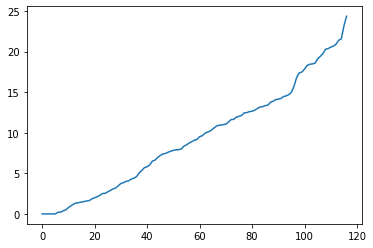

In [80]:
plt.plot(eigenvalues_laplacian)
plt.show()

## Topological

Loops, Betti numbers, persistent homology

In [81]:
pip install ripser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 3.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 47 kB 6.2 MB/s 
  Created wheel for ripser: filename=ripser-0.6.4-cp37-cp37m-linux_x86_64.whl size=457764 sha256=dce0a022e661edca0a2b5f47d00e12b6780baa6b3c70645820e377e671611b52
  Stored in directory: /root/.cache/pip/wheels/62/fb/5a/a32dc69b86a4548cca943e467cdf256a94e9d9da649583ea78
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18120 sha256=4c5904db88902ae8317197830445d2f0efdb18d22788d3fc9ca2350f801bf1b4
  Stored in directory: /root/.cache/pip/wheels/d2/9f/a8/67f1b86e47cd17338d3d07939f4660378e65b758c4594f96e3
Successfully built ripser hopcroftkarp


In [82]:
from ripser import ripser
import diagram2vec

In [83]:
# reverse matrix to add higher correlated edges first to the filtration
R_filtered = 1 - np.abs(R[0])

In [84]:
# compute persistence diagram of the network
diagram_R = ripser(R_filtered, distance_matrix=True)["dgms"]
diagram_R

[array([[0.        , 0.02006144],
        [0.        , 0.03446262],
        [0.        , 0.05540868],
        [0.        , 0.0620777 ],
        [0.        , 0.09534966],
        [0.        , 0.10306221],
        [0.        , 0.107329  ],
        [0.        , 0.11370007],
        [0.        , 0.11586844],
        [0.        , 0.11613584],
        [0.        , 0.11899531],
        [0.        , 0.12150691],
        [0.        , 0.12390698],
        [0.        , 0.12450194],
        [0.        , 0.13180907],
        [0.        , 0.13612933],
        [0.        , 0.13950187],
        [0.        , 0.14269306],
        [0.        , 0.1442786 ],
        [0.        , 0.14459632],
        [0.        , 0.1446449 ],
        [0.        , 0.14481983],
        [0.        , 0.14716239],
        [0.        , 0.14852008],
        [0.        , 0.15469271],
        [0.        , 0.1549944 ],
        [0.        , 0.16148454],
        [0.        , 0.16532291],
        [0.        , 0.16710863],
        [0.   

In [85]:
# vectorize persistent diagram
betti_curve = diagram2vec.persistence_curve(diagram_R)
betti_curve

array([[[116., 116., 116., 115., 114., 114., 113., 112., 112., 112.,
         111., 109., 105., 102.,  99.,  92.,  90.,  86.,  84.,  80.,
          77.,  71.,  66.,  62.,  51.,  47.,  47.,  46.,  44.,  39.,
          35.,  35.,  29.,  27.,  25.,  22.,  19.,  19.,  16.,  15.,
          14.,  11.,  11.,   9.,   9.,   8.,   5.,   5.,   5.,   4.,
           4.,   4.,   4.,   4.,   4.,   3.,   3.,   3.,   2.,   1.,
           1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
           1.,   1.,   1.,   2.,   2.,   3.,   5.,   6.,   6.,   6.,
           4.,   4.,   7.,  11.,  11.,  12.,  13.,  13.,  14.,  14.,
          15.,  14

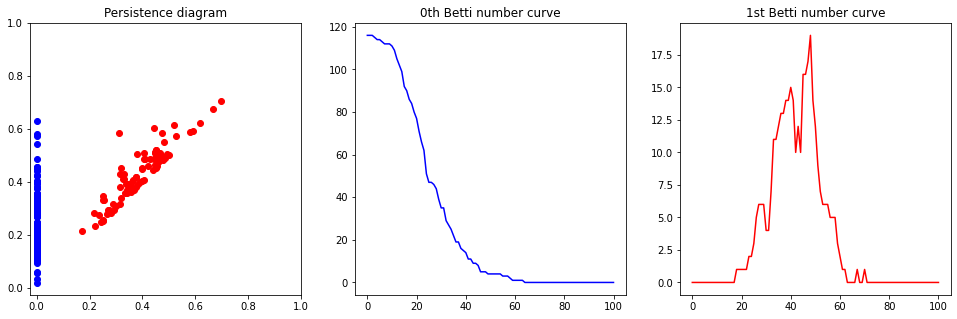

In [86]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16.5,5))
ax1.set_title("Persistence diagram")
ax1.set_xlim(-0.025,1)
ax1.set_ylim(-0.025,1)
ax1.scatter(diagram_R[0][:,0], diagram_R[0][:,1], c="b")
ax1.scatter(diagram_R[1][:,0], diagram_R[1][:,1], c="r")
ax2.set_title("0th Betti number curve")
ax2.plot(betti_curve[0,0], c="b")
ax3.set_title("1st Betti number curve")
ax3.plot(betti_curve[0,1], c="r")
plt.show()

## Machine learning

Use the computed graph, spectral and topological classes features with sklearn classifiers. Try concatenating and/or boosting features of different classes, and stacking/emsembling of classifiers.

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

In [108]:
def make_correlation_matrix(path_to_fmriprep_data, path_to_save_connectivity_matrices=False):
    """
        Process the fmriprep preprocessed functional MRI time-series into 2D correlation matrix as DataFrame using Nilearn lib.
    """
   
    dataset = datasets.fetch_atlas_aal(version='SPM12', data_dir=None, url=None, resume=True, verbose=1)
    atlas_filename = dataset.maps
    labels = dataset.labels
    correlation_measure = ConnectivityMeasure(kind='correlation')
    ts =  []
    for n_patient, patient_folder_name in tqdm(enumerate(os.listdir(path_to_fmriprep_data))):
        print(n_patient, patient_folder_name)
        temp_path = os.path.join(path_to_fmriprep_data, patient_folder_name)
        print(temp_path)
           # temp_path = path_to_fmriprep_data + patient_folder_name + '/func/'
        for filename in os.listdir(os.path.join(temp_path, 'ses-1/func')):
                    print(filename)

                    print(os.path.join(temp_path, 'ses-1/func', filename))

#                     tr = tr_extractor(os.path.join(temp_path, 'ses-1/func', filename))
#                     print(tr)
                    tr = 2
                     # extracted data from non-overlapping volumes
                    masker = NiftiLabelsMasker(labels_img=atlas_filename, background_label=labels, 
                               standardize=True, detrend=True, resampling_target='labels', 
                               low_pass=0.08, high_pass=0.009, t_r=tr, memory='nilearn_cache', memory_level=1, verbose=0)
                    
                    img = concat_imgs(os.path.join(temp_path, 'ses-1/func', filename), auto_resample=True, verbose=0)
                    print(img.shape)
                    confounds = high_variance_confounds(img, 1)
                    time_series = masker.fit_transform(img, confounds)
                    print(time_series.shape)
                    ts.append(time_series)
                    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
                    np.fill_diagonal(correlation_matrix, 1)

    return ts, time_series, correlation_matrix    

In [109]:
# load ABIDE1 data from NYU site
ts, time_series, correlation_matrix = make_correlation_matrix(data)

0it [00:00, ?it/s]

0 sub-28838
ABIDEII-GU_1/sub-28838
sub-28838_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28838/ses-1/func/sub-28838_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


1it [00:03,  3.94s/it]

(152, 117)
1 sub-28835
ABIDEII-GU_1/sub-28835
sub-28835_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28835/ses-1/func/sub-28835_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


2it [00:07,  3.88s/it]

(152, 117)
2 sub-28832
ABIDEII-GU_1/sub-28832
sub-28832_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28832/ses-1/func/sub-28832_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


3it [00:11,  4.04s/it]

(152, 117)
3 sub-28845
ABIDEII-GU_1/sub-28845
sub-28845_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28845/ses-1/func/sub-28845_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


4it [00:16,  4.04s/it]

(152, 117)
4 sub-28846
ABIDEII-GU_1/sub-28846
sub-28846_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28846/ses-1/func/sub-28846_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


5it [00:19,  3.92s/it]

(152, 117)
5 sub-28837
ABIDEII-GU_1/sub-28837
sub-28837_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28837/ses-1/func/sub-28837_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


6it [00:24,  4.04s/it]

(152, 117)
6 sub-28844
ABIDEII-GU_1/sub-28844
sub-28844_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28844/ses-1/func/sub-28844_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


7it [01:13, 18.92s/it]

(152, 117)
7 sub-28836
ABIDEII-GU_1/sub-28836
sub-28836_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28836/ses-1/func/sub-28836_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


8it [01:52, 25.44s/it]

(152, 117)
8 sub-28843
ABIDEII-GU_1/sub-28843
sub-28843_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28843/ses-1/func/sub-28843_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


9it [02:31, 29.65s/it]

(152, 117)
9 sub-28847
ABIDEII-GU_1/sub-28847
sub-28847_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28847/ses-1/func/sub-28847_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


10it [03:11, 32.71s/it]

(152, 117)
10 sub-28839
ABIDEII-GU_1/sub-28839
sub-28839_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28839/ses-1/func/sub-28839_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


11it [03:50, 34.63s/it]

(152, 117)
11 sub-28842
ABIDEII-GU_1/sub-28842
sub-28842_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28842/ses-1/func/sub-28842_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


12it [04:30, 36.26s/it]

(152, 117)
12 sub-28840
ABIDEII-GU_1/sub-28840
sub-28840_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28840/ses-1/func/sub-28840_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


13it [05:10, 37.42s/it]

(152, 117)
13 sub-28834
ABIDEII-GU_1/sub-28834
sub-28834_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28834/ses-1/func/sub-28834_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


14it [05:49, 37.81s/it]

(152, 117)
14 sub-28831
ABIDEII-GU_1/sub-28831
sub-28831_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28831/ses-1/func/sub-28831_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


15it [06:29, 38.42s/it]

(152, 117)
15 sub-28841
ABIDEII-GU_1/sub-28841
sub-28841_ses-1_task-rest_run-1_bold.nii.gz
ABIDEII-GU_1/sub-28841/ses-1/func/sub-28841_ses-1_task-rest_run-1_bold.nii.gz
(64, 64, 43, 152)


16it [07:03, 26.48s/it]

(152, 117)


In [110]:
ts = np.stack(ts)
(n_patients, n_steps, n_regions) = ts.shape

In [111]:
# compute correlation networks
R = ConnectivityMeasure(kind="correlation").fit_transform(ts)
R.shape

(16, 117, 117)

In [112]:
R.shape

(16, 117, 117)

#### Topological features

In [113]:
# topological features
R_filtration = 1 - np.abs(R)

diagrams = []

for i, R_filtered in enumerate(R_filtration):
    diagram = ripser(R_filtered, distance_matrix=True)["dgms"]
    diagrams.append(diagram)

In [114]:
X_topological = diagram2vec.persistence_curve(diagrams, quantity="persistence", m=40)

In [115]:
X_topological[:,0].shape

(16, 40)

In [116]:
dataset = datasets.fetch_atlas_aal(version='SPM12', data_dir=None, url=None, resume=True, verbose=1)
len(dataset.labels)

116

In [122]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
# cross_val_score(clf, X_topological[:,1], dataset.labels[:16], cv=10).mean()

#### Graph features

In [123]:
R_thresholded = np.copy(R)
for i in range(R_thresholded.shape[0]):
    np.fill_diagonal(R_thresholded[i], 0)

R_thresholded[R_thresholded < 0.47] = 0.0

In [124]:
# graph features
X_graph = np.zeros((n_patients, n_regions*5))

for i in range(R_thresholded.shape[0]):
    
    G = nx.from_numpy_array(R_thresholded[i])
    
    degree = np.array([degree[1] for degree in nx.degree(G)])
    neighbor_degree_avg = np.array(list(nx.average_neighbor_degree(G).values()))
    centrality_betweenness = np.array(list(nx.betweenness_centrality(G).values()))
    centrality_closeness = np.array(list(nx.closeness_centrality(G).values()))
    clustering_coefficient = np.array(list(nx.clustering(G).values()))
    
    feature_i = np.concatenate((degree, neighbor_degree_avg, centrality_betweenness, centrality_closeness, clustering_coefficient))
    X_graph[i] = feature_i


In [126]:
# cross_val_score(clf, X_graph, dataset.labels[:16], cv=10).mean()

#### Spectral features

In [127]:
# spectral features (eigher spectrum or Laplacian spectrum)
X_spectral = np.zeros((n_patients, n_regions))

for i in range(R_thresholded.shape[0]):
    eigenvalues_i, _ = np.linalg.eigh(R_thresholded[i])
    X_spectral[i] = eigenvalues_i

In [128]:
# cross_val_score(clf, X_spectral, dataset.labels[:16], cv=10).mean()

#### Features concatenation

In [129]:
# cross_val_score(clf, np.concatenate((X_graph, X_spectral, X_topological[:,1]), axis=1), dataset.labels[:16], cv=10).mean()

**Task**

Repeat the feature extraction and machine learning pipeline on mutual information matrices. Note that the estimation of mutual information matrices could be be time-consuming.